In [82]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import itertools

In [83]:
with open("allowed_words.txt") as file:
    allowed_words = [line.rstrip() for line in file]

In [84]:
#the secret search word
#assume that the search word is from the list, this way we can switch the list out for a bigger list
secret = random.choice(allowed_words)
print(secret)

diffs


In [85]:
#the game itself, have not coded number of tries

def wordle(guess: string):
    response = {'black': [], 'yellow': [], 'green': []}
    if guess in allowed_words:
        for i in range(5):
            if guess[i] == secret[i]:
                response['green'].append(i)
            elif guess[i] in secret:
                response['yellow'].append(i)
            else:
                response['black'].append(i)
    else:
        print("not a valid word")

    #print the responses, v nice
    #print(response)
    return response

In [86]:
#naive attempt begins here. Here, I dont even care about frequencies, I just pick a word at random and then reduce list and then repeat.
#returns number of attempts


def naive():
    ctr = 0 

    word_list = allowed_words.copy()
    alphabet = string.ascii_lowercase

    while True:
        ctr += 1

        guess = random.choice(word_list)
        response = wordle(guess)
        for word in word_list:
            remove = False
            for i in response['black']:                             #removes the words and the letters if black
                if guess[i] in word:
                    remove = True
                    alphabet.replace(guess[i], '')
            for i in response['yellow']:                            #removes just the words which don't have the letter in the correct place as well as which dont have the letter at all
                if (guess[i] == word[i] or not(guess[i] in word)) :
                    remove = True
            for i in response['green']:
                if guess[i] != word[i]:
                    remove = True
            if remove:
                word_list.remove(word)
        if guess == secret:
            print("game over")
            break
    
    return ctr

In [87]:
#average performance of naive over 10,000 trials 

n = 10
sum = 0
for i in range(n):
    ctr = naive()
    sum += ctr

mean = sum/n

print(mean)

game over
game over
game over
game over
game over
game over
game over
game over
game over
game over
15.6


In [88]:
#frequency of letters throughout 'allowed_words'
def freq_dict(alphabet, word_list):
   freq = {}

   for letter in alphabet:
      ctr = 0
      for word in word_list:
         ctr += word.count(letter)
      f = ctr/(5*len(word_list))
      freq[letter] = f

   return dict(sorted(freq.items(), key=lambda item: item[1], reverse = True))

def plot(freq):
   plt.bar(range(len(freq)), list(freq.values()), align='center')
   plt.xticks(range(len(freq)), list(freq.keys()))
   plt.show()

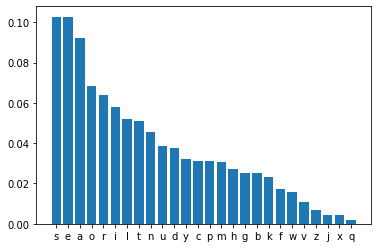

In [89]:
freq = freq_dict(string.ascii_lowercase, allowed_words)

plot(freq)

In [90]:
#Naive 2.0. This time, I want to use the frequencies of letters over the words to make an educated guess. Let's see how it goes.
# I haven't included letter repetition within word. Each guess is just a random one within the subset of the words from the top frequent word


#EDIT: THIS FUNCTION DOES JACK SHIT, USELESS PIECE OF SHIT FUCKIN INEFFECIENT BASTARD


def not_naive(freq_parameter):
    ctr = 0

    word_list = allowed_words.copy()
    alphabet = string.ascii_lowercase


    while True:
        ctr += 1

        #choosing 10 as arbitrary point to select most frequent
    #looking at words containing most frequent letters

        alphabet_freq = freq_dict(alphabet, word_list)
        freq_letters = ''.join({x for x in dict(itertools.islice(alphabet_freq.items(), min(freq_parameter, len(alphabet)))).keys()})
        truncated_word_list = word_list.copy()
        for word in truncated_word_list:
            for letter in word:
                if not(letter in freq_letters):
                    truncated_word_list.remove(word)
                    break
        if len(truncated_word_list)>0:
            guess = random.choice(truncated_word_list)
        else:
            guess = random.choice(word_list)
        
        
        response = wordle(guess)
        for word in word_list:
            remove = False
            for i in response['black']:                             #removes the words and the letters if black
                if guess[i] in word:
                    remove = True
                    alphabet.replace(guess[i], '')
            for i in response['yellow']:                            #removes just the words which don't have the letter in the correct place as well as which dont have the letter at all
                if (guess[i] == word[i] or not(guess[i] in word)) :
                    remove = True
            for i in response['green']:
                if guess[i] != word[i]:
                    remove = True
            if remove:
                word_list.remove(word)
        if guess == secret:
            break

    return ctr

In [91]:
#testing for best cutoff parameter over n tries

n = 5
average_truncation = []
for k in range(1, 26):
    sum = 0
    for i in range(n):
        sum += not_naive(k)
    sum = sum/n
    average_truncation.append(sum)

print(average_truncation)

[16.8, 15.6, 16.2, 15.2, 15.0, 14.2, 13.0, 15.4, 13.2, 15.4, 15.2, 13.8, 14.6, 14.0, 16.4, 15.8, 14.8, 13.2, 16.6, 12.8, 13.8, 15.2, 15.6, 16.8, 15.4]
